<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><h1>

# Dataset Info

** An image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


## View images from the data set.

In [6]:
X_train[9].shape

(28, 28)

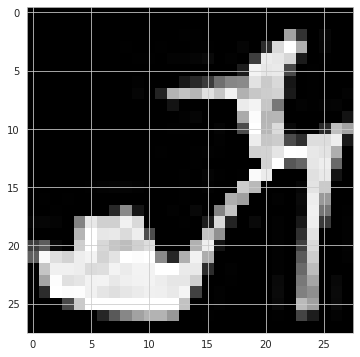

In [7]:
plt.imshow(X_train[9],cmap='gray');

In [8]:
X_train[9] #pixel values of 9th image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
y_train[9]

5

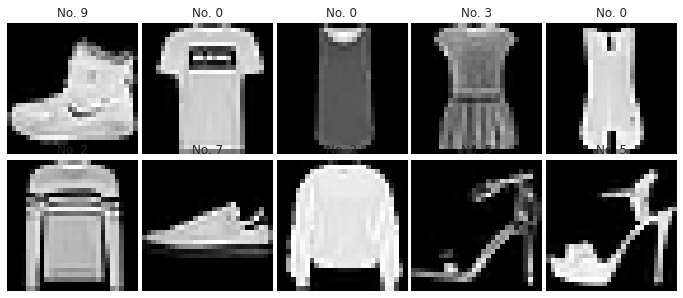

In [11]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
     
plt.tight_layout()
plt.show()
plt.close()

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Data Preprocessing

## Scaling

In [13]:
X_train[9].min()

0

In [14]:
X_train[9].max()

255

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
X_train[9].min()

0.0

In [17]:
X_train[9].max()

1.0

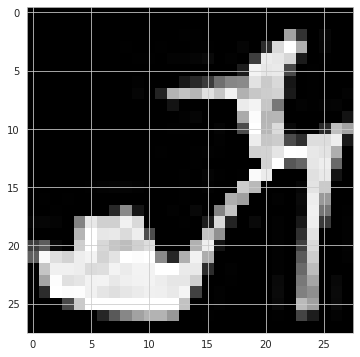

In [18]:
plt.imshow(X_train[9],cmap='gray') # There is no change after scaling

In [19]:
X_train[9].shape

(28, 28)

## Reshaping the dimensions

In [20]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
X_train[9].shape

(28, 28)

In [22]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
X_train[9].shape

(28, 28, 1)

## Converting the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train.shape

(60000,)

In [27]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [28]:
y_train[9]

5

In [29]:
Y_train[9] #one-hot encoded for categorical analysis

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout

In [31]:
X_train.shape[1:]

(28, 28, 1)

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape= X_train.shape[1:], activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides= 1))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 32)       128       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 128)               2560128   
                                                                 
 dropout (Dropout)           (None, 128)               0

##  Model Training

## Modelling-1

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop]) 

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4241 - accuracy: 0.8536 - val_loss: 0.3111 - val_accuracy: 0.8899
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3047 - accuracy: 0.8952 - val_loss: 0.2738 - val_accuracy: 0.8997
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2724 - accuracy: 0.9060 - val_loss: 0.2723 - val_accuracy: 0.9080
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2497 - accuracy: 0.9142 - val_loss: 0.2745 - val_accuracy: 0.9015
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2372 - accuracy: 0.9179 - val_loss: 0.2748 - val_accuracy: 0.9022


### Plotting values of metrics used in model-1

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.424,0.854,0.311,0.890
1,0.305,0.895,0.274,0.900
2,0.272,0.906,0.272,0.908
3,0.250,0.914,0.274,0.901
4,0.237,0.918,0.275,0.902


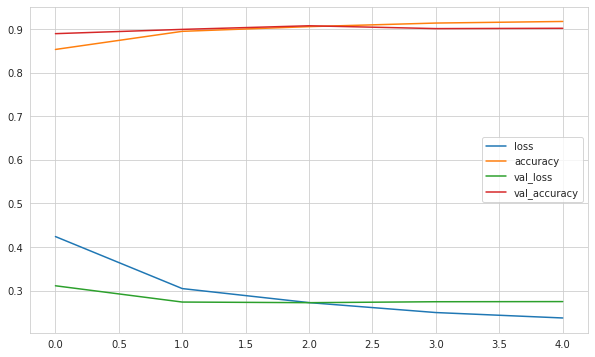

In [39]:
summary.plot();

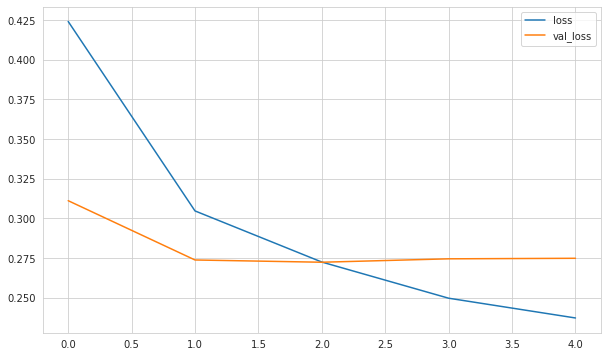

In [40]:
summary[["loss", "val_loss"]].plot();

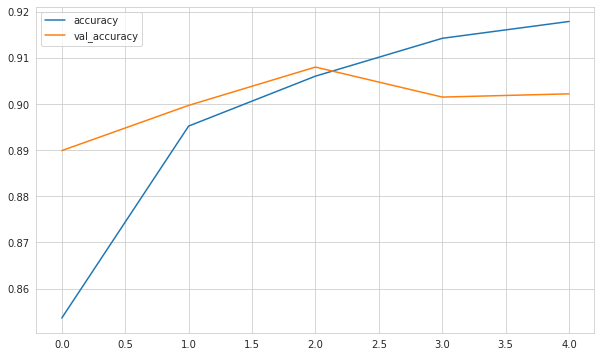

In [41]:
summary[["accuracy", "val_accuracy"]].plot();

### Model-1 Evaluation

In [43]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [44]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.9080


[0.27233678102493286, 0.9079999923706055]

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27233678102493286
Test accuracy: 0.9079999923706055


In [46]:
pred_prob = model.predict(X_test)
pred_prob

array([[2.2124211e-06, 1.5796384e-05, 4.3408454e-06, ..., 3.4656463e-04,
        1.3993031e-05, 9.9934632e-01],
       [1.2849535e-05, 4.3982427e-06, 9.9983144e-01, ..., 2.6905602e-07,
        1.8473576e-06, 1.7939257e-07],
       [2.8644706e-11, 1.0000000e+00, 2.6024244e-12, ..., 1.3353027e-11,
        1.5978989e-10, 2.5890021e-12],
       ...,
       [1.2180910e-06, 8.8767678e-08, 1.0619506e-06, ..., 6.3890673e-07,
        9.9998510e-01, 3.2446465e-07],
       [1.5931043e-12, 1.0000000e+00, 3.7230096e-13, ..., 5.5334804e-12,
        3.6973462e-11, 2.0124796e-11],
       [2.7585279e-03, 2.0494000e-03, 3.8136344e-03, ..., 3.8588490e-02,
        4.9146633e-03, 1.4185968e-02]], dtype=float32)

In [47]:
y_pred = np.argmax(pred_prob, axis=1)# we choose the highest probability between ten classes
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.83      0.86      1000
           3       0.88      0.94      0.91      1000
           4       0.84      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.74      0.74      1000
           7       0.97      0.94      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [49]:
print(confusion_matrix(y_test, y_pred))

[[847   2  13  33   6   2  94   0   3   0]
 [  0 983   0  11   2   0   2   0   2   0]
 [ 13   1 832  12  71   0  71   0   0   0]
 [  9   6   7 941  17   0  20   0   0   0]
 [  1   1  33  31 867   0  67   0   0   0]
 [  0   0   0   0   0 983   0   5   0  12]
 [ 95   0  52  42  67   0 740   0   4   0]
 [  0   0   0   0   0  12   0 937   0  51]
 [  1   2   0   4   4   3   8   5 973   0]
 [  0   0   0   0   0   7   1  15   0 977]]


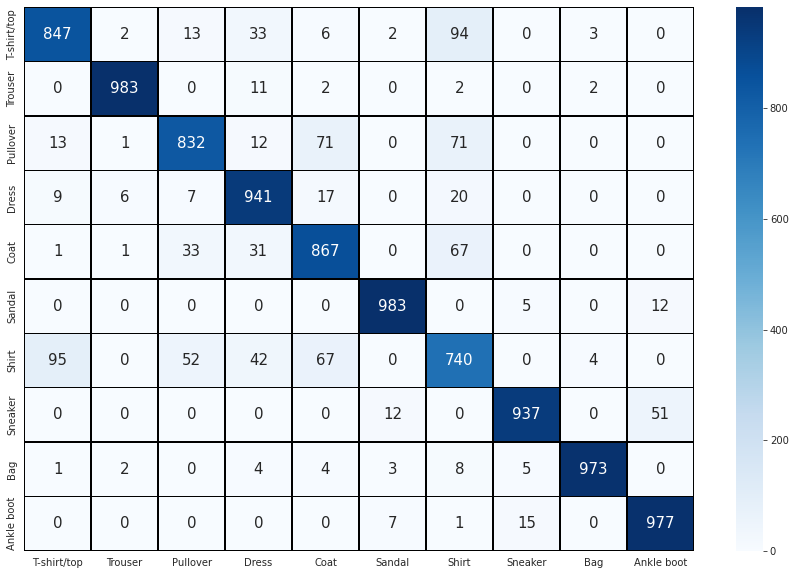

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, xticklabels=classes, yticklabels=classes,linecolor='black', fmt='g', annot_kws = {"size": 15});

In [51]:
(y_test != y_pred).sum() # Total of False predictions

920

## Modelling-2

In [66]:
model2= Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train.shape[1:], padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))    
model2.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.4))
        
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                      

In [68]:
early_stop = EarlyStopping(monitor='val_accuracy', mode="max", patience=2, restore_best_weights = True)

In [121]:
model2.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2765 - accuracy: 0.9127 - val_loss: 0.2330 - val_accuracy: 0.9205
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2682 - accuracy: 0.9155 - val_loss: 0.2051 - val_accuracy: 0.9285
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2627 - accuracy: 0.9160 - val_loss: 0.2132 - val_accuracy: 0.9280
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2538 - accuracy: 0.9188 - val_loss: 0.2159 - val_accuracy: 0.9270


### Plotting values of metrics used in model-2

In [122]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.276,0.913,0.233,0.920
1,0.268,0.915,0.205,0.928
2,0.263,0.916,0.213,0.928
3,0.254,0.919,0.216,0.927


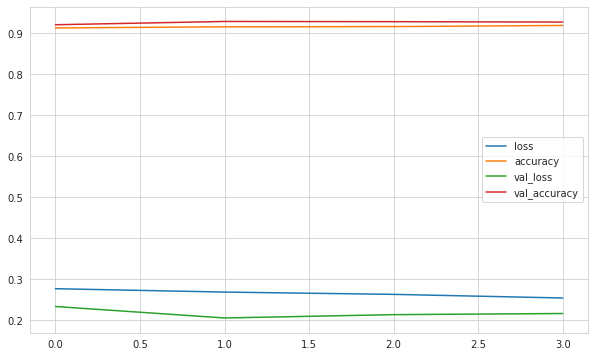

In [123]:
summary.plot();

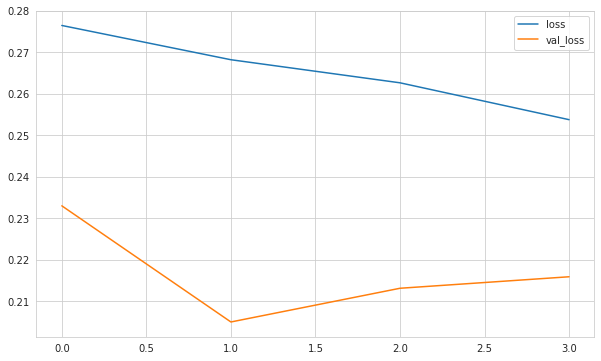

In [124]:
summary[["loss", "val_loss"]].plot();

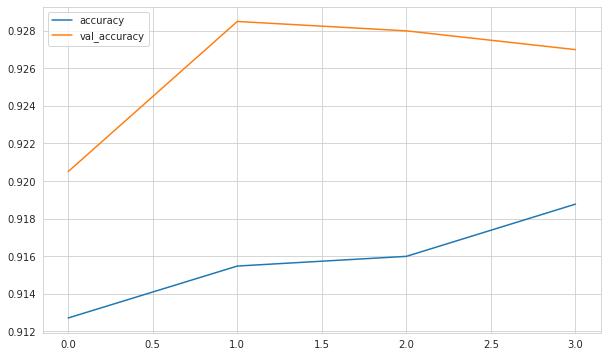

In [126]:
summary[["accuracy", "val_accuracy"]].plot();

### Model-2 Evaluation

In [127]:
score = model2.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2050502449274063
Test accuracy: 0.9284999966621399


In [128]:
pred_prob = model2.predict(X_test)

In [129]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.92      0.88      0.90      1000
           3       0.93      0.93      0.93      1000
           4       0.87      0.91      0.89      1000
           5       0.99      0.98      0.99      1000
           6       0.78      0.77      0.78      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [131]:
print(confusion_matrix(y_test, y_pred))

[[878   0  10   9   3   1  96   0   3   0]
 [  0 990   0   7   0   0   1   0   2   0]
 [ 16   1 884   6  46   0  47   0   0   0]
 [ 14   4   8 925  22   0  27   0   0   0]
 [  0   0  18  20 914   0  48   0   0   0]
 [  0   0   0   0   0 982   0  12   0   6]
 [ 94   3  43  22  61   0 773   0   4   0]
 [  0   0   0   0   0   1   0 985   0  14]
 [  2   0   0   3   2   1   1   2 989   0]
 [  0   0   1   0   0   5   0  29   0 965]]


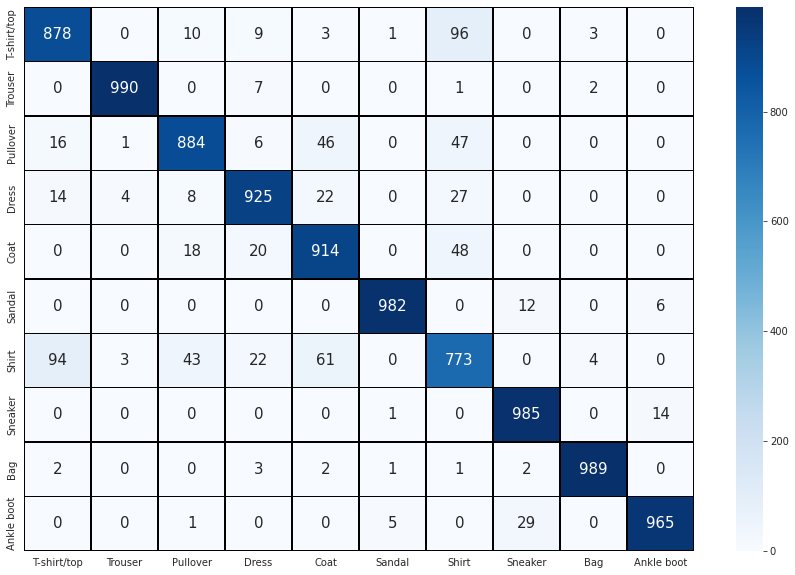

In [146]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, xticklabels=classes, yticklabels=classes,linecolor='black', fmt='g', annot_kws = {"size": 15});

In [132]:
(y_test != y_pred).sum() # Total of False predictions

715

## Saving Model

In [133]:
model2.save('Fashion_MNIST_model.h5')

## Prediction

In [134]:
from tensorflow.keras.models import load_model

In [135]:
model= load_model('Fashion_MNIST_model.h5')

In [136]:
choosed_image_line = 9 # Enter any image row in the test folder

In [137]:
my_image = X_test[choosed_image_line].reshape(28, 28)

In [138]:
my_image.shape

(28, 28)

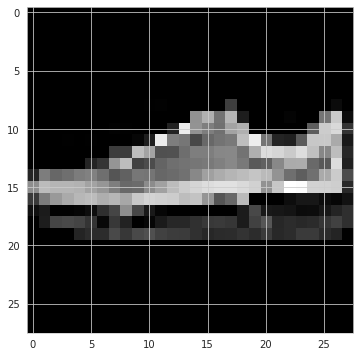

In [139]:
plt.imshow(my_image, cmap='gray');

In [140]:
pred=model.predict(np.expand_dims(X_test[choosed_image_line],axis=0))
pred

array([[2.5525335e-08, 2.8319681e-08, 2.4885674e-08, 5.5950061e-08,
        3.2782992e-08, 2.4618863e-04, 4.1641492e-08, 9.9953139e-01,
        1.3343386e-07, 2.2224495e-04]], dtype=float32)

In [141]:
np.argmax(pred)

7

In [142]:
result = np.argmax(pred)
result

7

In [143]:
classes[result]

'Sneaker'

In [144]:
def prediction(choosed_image_line):
  my_image = X_test[choosed_image_line].reshape(28, 28)
  pred=model.predict(np.expand_dims(my_image,axis=0))
  result = np.argmax(pred)
  print("Result of prediction    : ", classes[int(result)])
  plt.imshow(my_image, cmap='gray');
  print("The picture you choosed")

Result of prediction    :  Sneaker
The picture you choosed


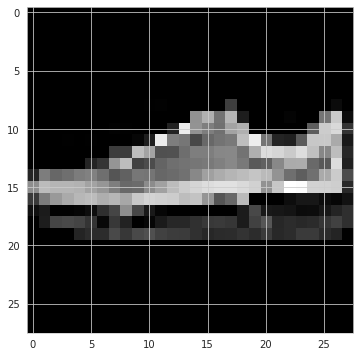

In [145]:
prediction(9)